In [ ]:
### Authoritarian Subjectivity

In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

Toggle code

ImportError: Traceback (most recent call last):
  File "E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
global BES_label_list, BES_df_list

# %run f2f_utility.py

# BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
BES_df_list = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle" )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
# BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
BES_label_list = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle" )
# demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
demo_var_dict = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle" )
# var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )
var_type_dict_nonans = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle" )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'

In [6]:
f2f_harmonised_values = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')

In [7]:
f2f_harmonised[f2f_harmonised_values.columns] = f2f_harmonised_values

In [8]:
f2f_harmonised2017 = f2f_harmonised[f2f_harmonised["dataset"]=="2017"]

In [9]:
WCorMC = BES_df_list["2017"]["w03"].replace('Don`t know',np.nan).replace('Upper class',"Middle class")
WCorMC = WCorMC.apply(lambda x: np.nan if pd.isna(x) else x=="Middle class").astype('float')
WCorMC.value_counts(dropna=False)
ns_sec_analytic = BES_df_list["2017"]["ns_sec_analytic"]
soc_lib_auth_complete = f2f_harmonised2017["soc_lib_auth_complete"]
mask = WCorMC.notnull() & ns_sec_analytic.notnull() & soc_lib_auth_complete

In [123]:
## w03 *growing up* were your family working/middle class?

replace_dict = {'No':np.nan, 'Yes, working class':"Working class", 'Yes, middle class':"Middle class",
                  'Don`t know':np.nan, 'Yes, other':np.nan, 'Lower':"Working class",
                'Working middle class':np.nan,}
WCorMC = BES_df_list["2017"]["w01"].astype('object').replace(replace_dict)
#.replace('Don`t know',np.nan).replace('Upper class',"Middle class")
WCorMC = WCorMC.apply(lambda x: np.nan if pd.isna(x) else x=="Middle class").astype('float')
WCorMC.value_counts(dropna=False)
ns_sec_analytic = BES_df_list["2017"]["ns_sec_analytic"]
soc_lib_auth_complete = f2f_harmonised2017["soc_lib_auth_complete"]
mask = WCorMC.notnull() & ns_sec_analytic.notnull() & soc_lib_auth_complete

In [126]:
# WCorMC.value_counts(dropna=False)

In [67]:
WCorMC.groupby(ns_sec_analytic).mean().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.379747
Higher professional occupations                             0.519417
Lower professional and managerial and higher supervisory    0.343636
Intermediate occupations                                    0.212355
Employers in small organisations and own account workers    0.290155
Lower supervisory and technical occupations                 0.228916
Semi-routine occupations                                    0.170807
Routine occupations                                         0.110619
Name: w03, dtype: float64

In [127]:
pd.concat([WCorMC,soc_lib_auth_complete],axis=1).groupby(ns_sec_analytic).corr().sort_index()

w01  \
ns_sec_analytic                                                                      
Employers in large organisations and higher man... soc_lib_auth_complete -0.526710   
                                                   w01                    1.000000   
Higher professional occupations                    soc_lib_auth_complete -0.218587   
                                                   w01                    1.000000   
Lower professional and managerial and higher su... soc_lib_auth_complete -0.148053   
                                                   w01                    1.000000   
Intermediate occupations                           soc_lib_auth_complete -0.099487   
                                                   w01                    1.000000   
Employers in small organisations and own accoun... soc_lib_auth_complete -0.146171   
                                                   w01                    1.000000   
Lower supervisory and technical occupations        soc_lib_auth_complete -0.188352   
                                                   w01                    1.000000   
Semi-routine occupations                           soc_lib_auth_complete -0.020165   
                                                   w01                    1.000000   
Routine occupations                                soc_lib_auth_complete -0.087825   
                                                   w01                    1.000000   

                                                                          soc_lib_auth_complete  
ns_sec_analytic                                                                                  
Employers in large organisations and higher man... soc_lib_auth_complete               1.000000  
                                                   w01                                -0.526710  
Higher professional occupations                    soc_lib_auth_complete               1.000000  
                                                   w01                                -0.218587  
Lower professional and managerial and higher su... soc_lib_auth_complete               1.000000  
                                                   w01                                -0.148053  
Intermediate occupations                           soc_lib_auth_complete               1.000000  
                                                   w01                                -0.099487  
Employers in small organisations and own accoun... soc_lib_auth_complete               1.000000  
                                                   w01                                -0.146171  
Lower supervisory and technical occupations        soc_lib_auth_complete               1.000000  
                                                   w01                                -0.188352  
Semi-routine occupations                           soc_lib_auth_complete               1.000000  
                                                   w01                                -0.020165  
Routine occupations                                soc_lib_auth_complete               1.000000  
                                                   w01                                -0.087825

In [65]:
ns_sec_analytic.value_counts().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial       84
Higher professional occupations                             212
Lower professional and managerial and higher supervisory    570
Intermediate occupations                                    271
Employers in small organisations and own account workers    201
Lower supervisory and technical occupations                 170
Semi-routine occupations                                    335
Routine occupations                                         233
Name: count, dtype: int64

In [128]:
BES_reduced_with_na = pd.get_dummies(BES_df_list["2017"])
# temp = pd.get_dummies()
BES_reduced_with_na["WCorMC"] = WCorMC
BES_reduced_with_na["soc_lib_auth_complete"] = f2f_harmonised2017["soc_lib_auth_complete"]

BES_reduced_with_na[f2f_harmonised2017.columns] = f2f_harmonised2017
BES_reduced_with_na = BES_reduced_with_na.select_dtypes('number')

In [37]:
BES_reduced_with_na[mask].drop(drop_list,axis=1)[["WCorMC","soc_lib_auth_complete"]].corr()

,WCorMC,soc_lib_auth_complete
WCorMC,1.000000,-0.324442
soc_lib_auth_complete,-0.324442,1.000000


In [40]:
search(BES_reduced_with_na.drop(drop_list,axis=1),"soc_lib|f01|r04|q12|p03").index

Index(['f01_1_Don't know', 'f01_1_Strongly disagree', 'f01_1_Disagree',
       'f01_1_Neither agree nor disagree', 'f01_1_Agree',
       'f01_1_Strongly agree', 'f01_2_Don't know', 'f01_2_Strongly disagree',
       'f01_2_Disagree', 'f01_2_Neither agree nor disagree',
       ...
       'q12_cses_4_Neither agree nor disagree', 'q12_cses_4_Agree',
       'q12_cses_4_Strongly agree', 'q12_cses_5_Don't know',
       'q12_cses_5_Strongly disagree', 'q12_cses_5_Disagree',
       'q12_cses_5_Neither agree nor disagree', 'q12_cses_5_Agree',
       'q12_cses_5_Strongly agree', 'soc_lib_auth_complete'],
      dtype='object', length=191)

In [47]:
f2f_harmonised2017[mask].select_dtypes('number').corrwith(WCorMC[mask]).sort_values()
# sign gender effect -.1 corr
# sign income effect .16

soc_lib_auth             -0.324442
soc_lib_auth_complete    -0.324442
toughlaw                 -0.290323
censorship               -0.235071
respect                  -0.196880
death                    -0.188480
strongtu                 -0.142366
gender                   -0.100687
gender_complete          -0.100687
REFUK                    -0.088596
unconventional           -0.071457
AuthRight                -0.062074
wt                       -0.058503
CON                      -0.042263
DNV                      -0.034291
LD                       -0.027417
birth_year               -0.027388
ordinary                  0.010972
decade                    0.027388
generation                0.027388
age                       0.027388
harmonised_voted          0.034291
LAB                       0.037563
ec_left_right             0.052707
ec_left_right_complete    0.052707
LibLeft                   0.086395
inc_norm_wt               0.138551
inc(quartile)             0.138551
rich                

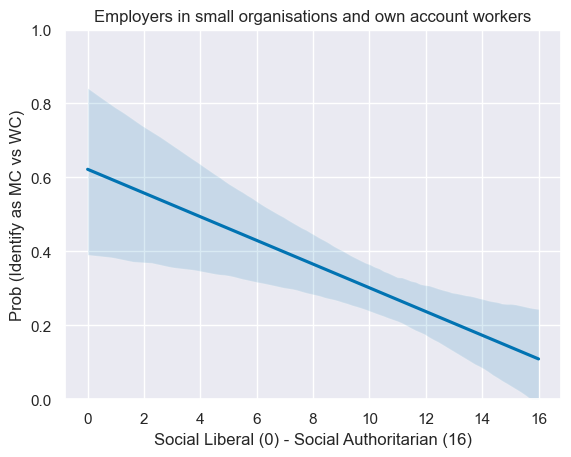

MSE: 0.20, MAE: 0.39, EV: 0.19, R2: 0.19


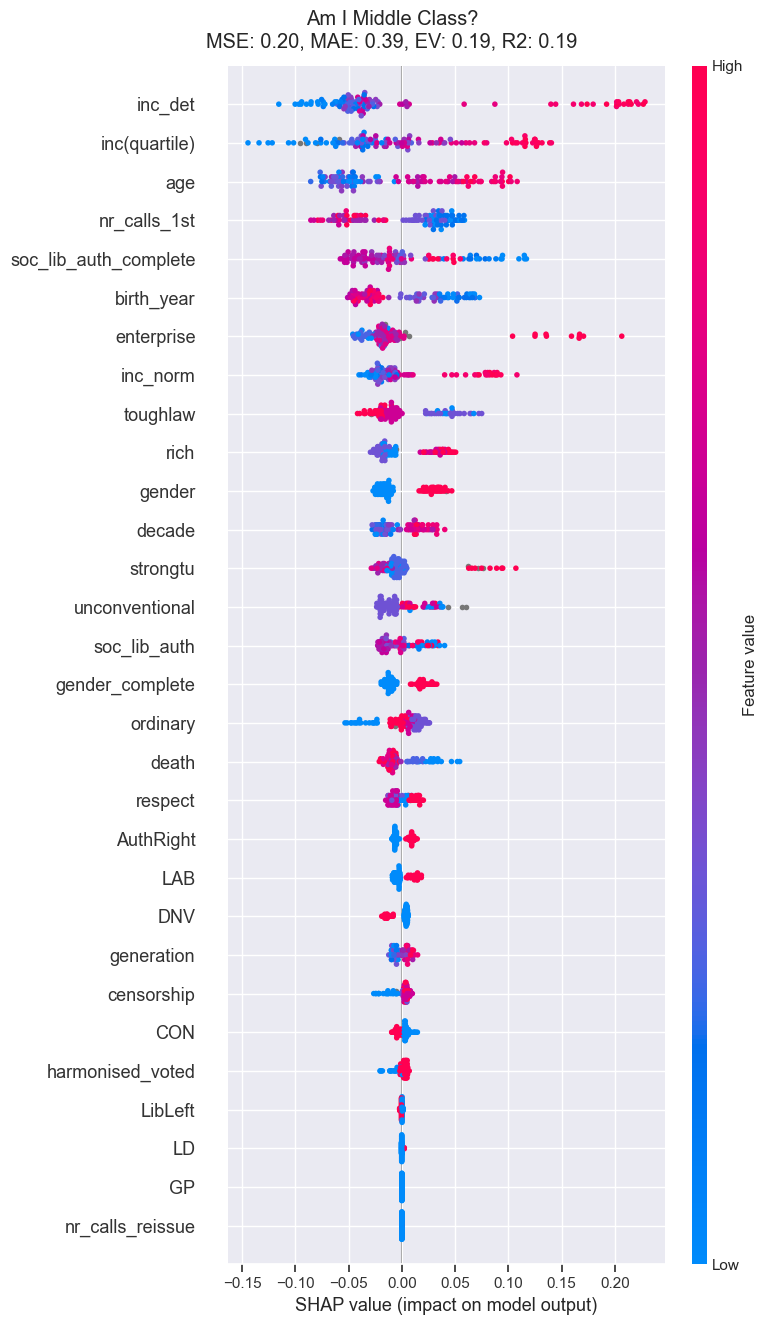

CPU times: total: 2.64 s
Wall time: 727 ms


In [129]:
%%time

# mask = BES_df_list["2017"]["ns_sec_analytic"] == "Employers in large organisations and higher managerial"
mask = BES_df_list["2017"]["ns_sec_analytic"] == "Employers in small organisations and own account workers"

drop_list = list( BES_reduced_with_na[mask].var()[BES_reduced_with_na[mask].var()==0].index )
name ="WCorMC"

# df, corr_type = make_corr_summary(BES_reduced_with_na[mask].drop(drop_list,axis=1), name)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg, output_subfolder, metrics) = xgboost_run(
    title = "Am I Middle Class?",
    dataset=BES_reduced_with_na[mask].drop(drop_list,axis=1),
#     [search(BES_reduced_with_na.drop(drop_list,axis=1),"soc_lib|f01|r04|q12|p03|WCorMC").index],
                                                    var_list = [name],
                                                    var_stub_list = [name,"wt","pano","w03","w02","w01","ns_sec",
                                                                     "w09","finalserialno","w08","w13","ec_left_right"],
                                                    verbosity=0)

In [54]:
# straight up regression

# against, inc_norm, age, gender_complete, soc_lib_auth_complete    

In [70]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [131]:
BES_reduced_with_na["soc_lib_auth_complete"] = BES_reduced_with_na["soc_lib_auth_complete"]/16

In [130]:
BES_reduced_with_na["soc_lib_auth_complete"].describe()

count    2194.000000
mean        9.863147
std         3.498694
min         0.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: soc_lib_auth_complete, dtype: float64

In [132]:
data = BES_reduced_with_na[["soc_lib_auth_complete","age","gender_complete","WCorMC","inc_norm"]]
data[["age","gender_complete","WCorMC","inc_norm"]] = (data[["age","gender_complete","WCorMC","inc_norm"]]-data[["age","gender_complete","WCorMC","inc_norm"]].mean())/data[["age","gender_complete","WCorMC","inc_norm"]].std()

In [133]:
data.describe()

,soc_lib_auth_complete,age,gender_complete,WCorMC,inc_norm
count,2194.000000,2.194000e+03,2.194000e+03,1.294000e+03,2.194000e+03
mean,0.616447,1.003957e-16,6.639073e-17,7.687479e-17,-1.813600e-16
std,0.218668,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.876940e+00,-1.091451e+00,-7.473982e-01,-1.836532e+00
25%,0.437500,-8.469775e-01,-1.091451e+00,-7.473982e-01,-7.358420e-01
50%,0.625000,2.035909e-02,9.157941e-01,-7.473982e-01,-1.854969e-01
75%,0.750000,7.792786e-01,9.157941e-01,1.336941e+00,9.151933e-01
max,1.000000,2.513952e+00,9.157941e-01,1.336941e+00,2.015884e+00


                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     10.68
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.65e-07
Time:                        19:16:09   Log-Likelihood:                -58.373
No. Observations:                 110   AIC:                             126.7
Df Residuals:                     105   BIC:                             140.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.49

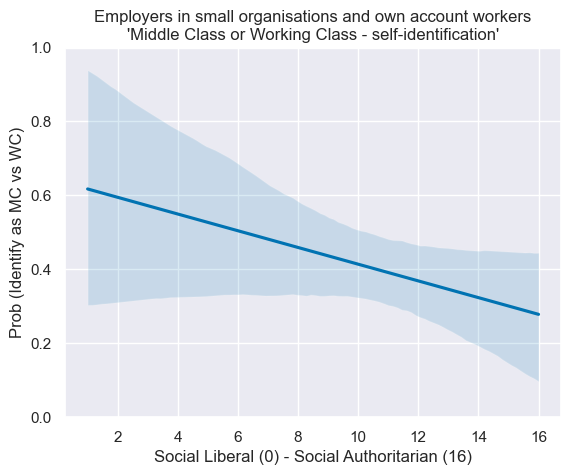

In [134]:
objClass = "Employers in small organisations and own account workers"
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

In [140]:
search(df_label_list,"edlevel")

NameError: name 'df_label_list' is not defined

In [144]:
BES_df_list["2017"]["edlevel"]

0       No qualifications
1              Below GCSE
2       No qualifications
3       No qualifications
4           Undergraduate
              ...        
2189                 GCSE
2190        Undergraduate
2191        Undergraduate
2192    No qualifications
2193             Postgrad
Name: edlevel, Length: 2194, dtype: category
Categories (6, object): ['No qualifications' < 'Below GCSE' < 'GCSE' < 'A-level' < 'Undergraduate' < 'Postgrad']

In [152]:
# search(BES_label_list["2017"],"edlevel")
# 
BES_reduced_with_na["edlevel"] = BES_df_list["2017"]["edlevel"].cat.codes.replace(-1,np.nan)
BES_reduced_with_na["edlevel"] = (BES_reduced_with_na["edlevel"]-BES_reduced_with_na["edlevel"].mean())/BES_reduced_with_na["edlevel"].std()

In [159]:
BES_reduced_with_na[["WCorMC","inc_norm","age","gender","soc_lib_auth_complete","edlevel"]][mask].dropna().shape#.corr()

(34, 6)

Index(['Employers in large organisations and higher managerial',
       'Higher professional occupations',
       'Lower professional and managerial and higher supervisory',
       'Intermediate occupations',
       'Employers in small organisations and own account workers',
       'Lower supervisory and technical occupations',
       'Semi-routine occupations', 'Routine occupations'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.770
Date:                Mon, 01 Jul 2024   Prob (F-statistic):              0.121
Time:                        23:16:16   Log-Likelihood:                -87.772
No. Observations:                 197   AIC:                             187.5
Df Residuals:                     191   BIC:                             207.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.01

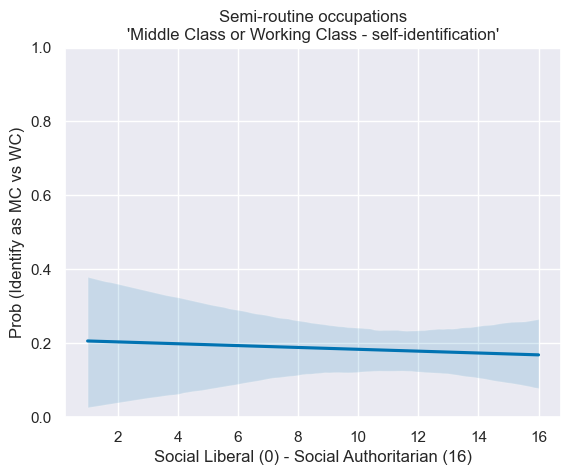

In [167]:
objClass = BES_df_list["2017"]["ns_sec_analytic"].cat.categories[6]
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete + edlevel", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5.992
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           0.000688
Time:                        22:30:38   Log-Likelihood:                -10.771
No. Observations:                  34   AIC:                             33.54
Df Residuals:                      28   BIC:                             42.70
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.30

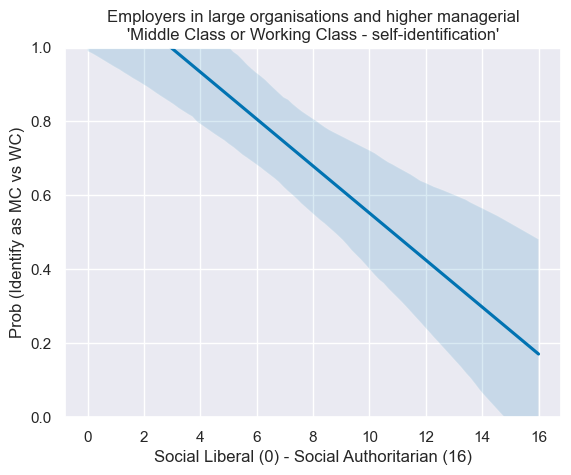

In [153]:
objClass = "Employers in large organisations and higher managerial"
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete + edlevel", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     3.871
Date:                Mon, 01 Jul 2024   Prob (F-statistic):            0.00535
Time:                        19:22:30   Log-Likelihood:                -76.851
No. Observations:                 129   AIC:                             163.7
Df Residuals:                     124   BIC:                             178.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.25

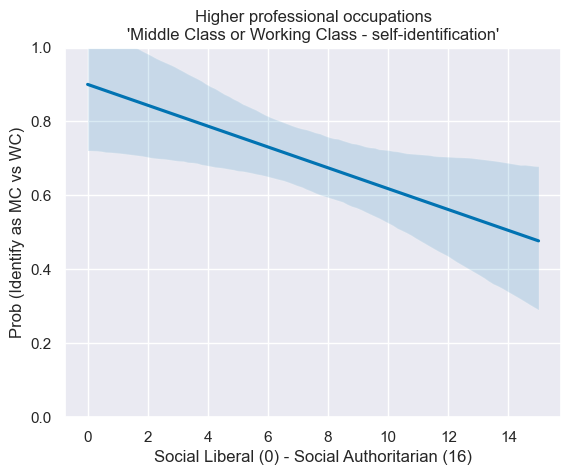

In [136]:
objClass = 'Higher professional occupations'
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.072
Date:                Mon, 01 Jul 2024   Prob (F-statistic):             0.0903
Time:                        19:26:29   Log-Likelihood:                -48.332
No. Observations:                 103   AIC:                             106.7
Df Residuals:                      98   BIC:                             119.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.12

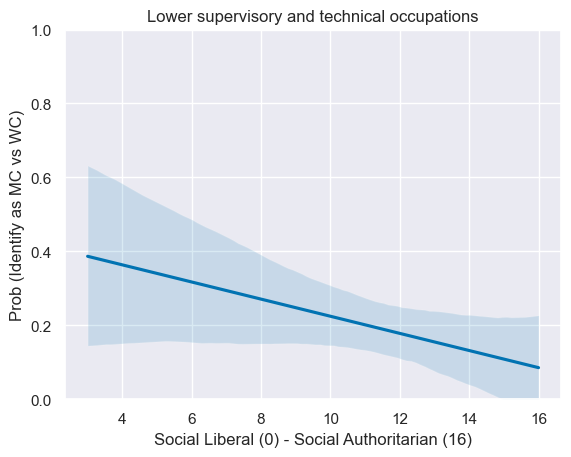

In [137]:
objClass = 'Lower supervisory and technical occupations'
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass);

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.641
Date:                Mon, 01 Jul 2024   Prob (F-statistic):              0.166
Time:                        19:26:34   Log-Likelihood:                -88.924
No. Observations:                 197   AIC:                             187.8
Df Residuals:                     192   BIC:                             204.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.02

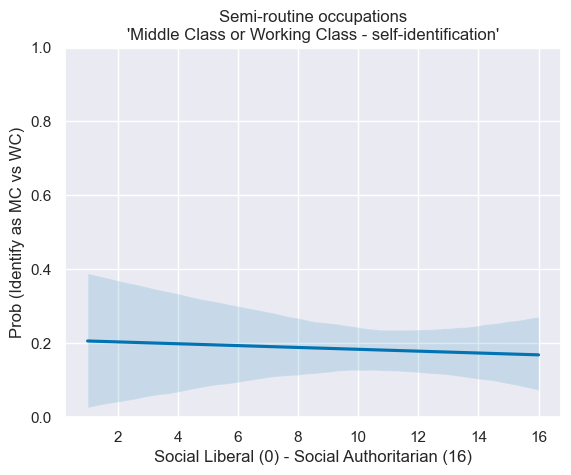

In [138]:
objClass = 'Semi-routine occupations'
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.929
Date:                Mon, 01 Jul 2024   Prob (F-statistic):              0.109
Time:                        19:26:53   Log-Likelihood:                -58.433
No. Observations:                 150   AIC:                             126.9
Df Residuals:                     145   BIC:                             141.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.10

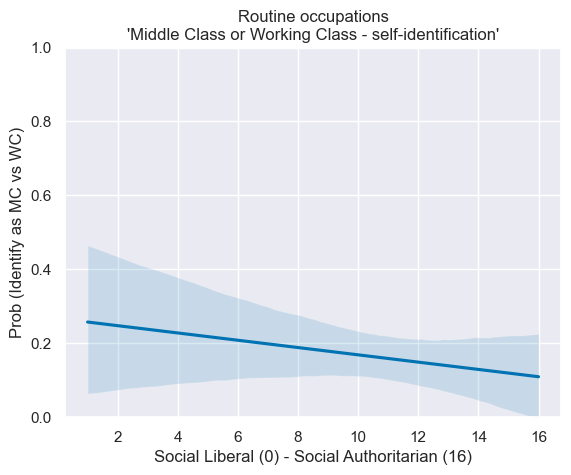

In [139]:
objClass = 'Routine occupations'
mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
sns.regplot(x=f2f_harmonised2017[mask]["soc_lib_auth_complete"],y=WCorMC[mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (0) - Social Authoritarian (16)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

In [107]:
BES_df_list["2017"]["ns_sec_analytic"].cat.categories

Index(['Employers in large organisations and higher managerial',
       'Higher professional occupations',
       'Lower professional and managerial and higher supervisory',
       'Intermediate occupations',
       'Employers in small organisations and own account workers',
       'Lower supervisory and technical occupations',
       'Semi-routine occupations', 'Routine occupations'],
      dtype='object')

In [103]:
# objClass = "Employers in small organisations and own account workers"
# mask = BES_df_list["2017"]["ns_sec_analytic"] == objClass
prestige_model = ols("WCorMC ~ inc_norm + age + gender + soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     4.674
Date:                Mon, 01 Jul 2024   Prob (F-statistic):            0.00129
Time:                        18:32:31   Log-Likelihood:                -110.55
No. Observations:                 191   AIC:                             231.1
Df Residuals:                     186   BIC:                             247.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.34

In [94]:
BES_df_list["2017"]["y09"][f2f_harmonised2017["gender"]==1]
# just checking!

0       Female
3       Female
4       Female
5       Female
6       Female
         ...  
2187    Female
2189    Female
2190    Female
2191    Female
2192    Female
Name: y09, Length: 1186, dtype: category
Categories (2, object): ['Male' < 'Female']

In [95]:
prestige_model = ols("WCorMC ~ soc_lib_auth_complete", data=BES_reduced_with_na[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 WCorMC   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     11.39
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           0.000893
Time:                        18:20:50   Log-Likelihood:                -115.79
No. Observations:                 193   AIC:                             235.6
Df Residuals:                     191   BIC:                             242.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.62

In [168]:
data

,soc_lib_auth_complete,age,gender_complete,WCorMC,inc_norm
0,0.3125,-1.714314,0.915794,-0.747398,-1.286187
1,1.0000,0.020359,-1.091451,-0.747398,-1.561360
2,0.8750,0.182985,-1.091451,-0.747398,-1.286187
3,1.0000,0.670862,0.915794,-0.747398,0.364848
4,0.6250,0.833487,0.915794,-0.747398,0.640021
...,...,...,...,...,...
2189,0.8125,0.345610,0.915794,NaN,1.465538
2190,0.6875,-0.359101,0.915794,NaN,1.740711
2191,0.7500,-0.142267,0.915794,NaN,-1.286187
2192,0.5000,1.592407,0.915794,-0.747398,-0.735842
